In [1]:
## Importing the libraries
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
## Loading the dataset
df = pd.read_csv("Downloads/Customer Data.csv")

## First 5 records
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.dropna(axis=0 , subset=['CREDIT_LIMIT'],inplace=True)

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
## Total percentage of nan values in Minimum_Payme
(df.MINIMUM_PAYMENTS.isnull().sum() / df.MINIMUM_PAYMENTS.value_counts(dropna=False).sum())*100

3.497597496927031

In [9]:
## Replacing nan values with median.

md=df.MINIMUM_PAYMENTS.median()
df['MINIMUM_PAYMENTS']=np.where(df.MINIMUM_PAYMENTS.isnull(),md,df['MINIMUM_PAYMENTS'])

In [10]:
##NO Null Values.
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
## Droping Cust_id col.
df.drop(['CUST_ID'],axis=1,inplace=True)

In [12]:
df.shape

(8949, 17)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,1564.647593,2081.584016,0.000000,128.365782,873.680279,2054.372848,19043.13856
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8949.0,1003.316936,2136.727848,0.000000,39.800000,361.490000,1110.170000,49039.57000
ONEOFF_PURCHASES,8949.0,592.503572,1659.968851,0.000000,0.000000,38.000000,577.830000,40761.25000
INSTALLMENTS_PURCHASES,8949.0,411.113579,904.378205,0.000000,0.000000,89.000000,468.650000,22500.00000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.000000,0.000000,0.000000,1113.868654,47137.21176
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8949.0,0.135141,0.200132,0.000000,0.000000,0.000000,0.222222,1.50000


<AxesSubplot:>

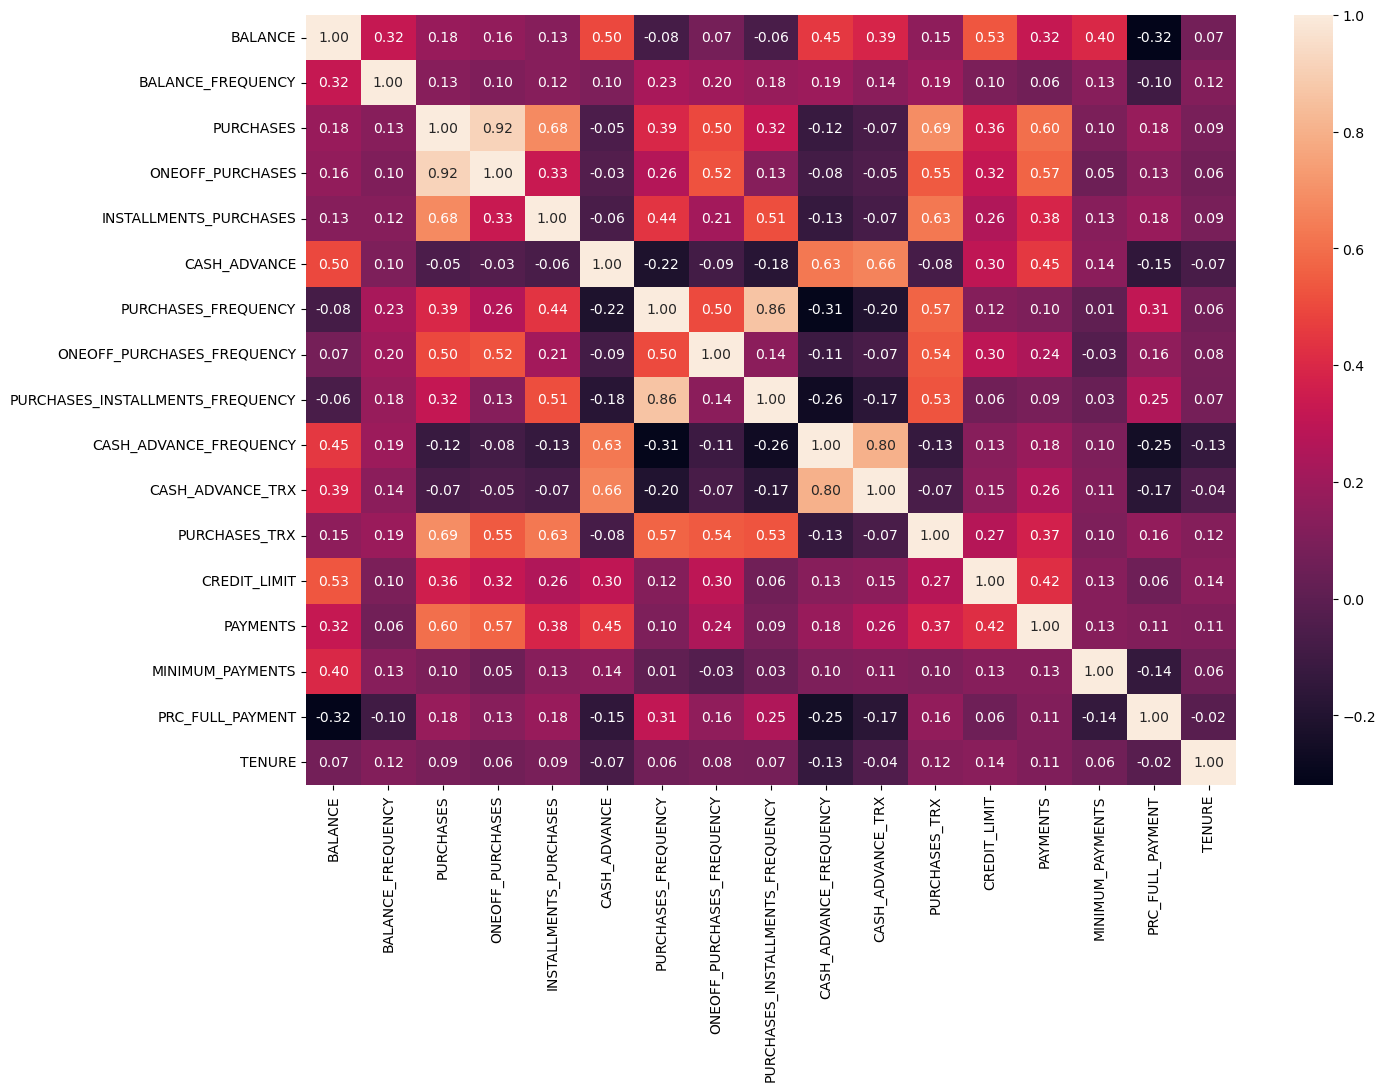

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True , fmt=".2f")

In [15]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [16]:
data=correlation(df,0.8)
print(data)

{'ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY'}


In [17]:
df=df.drop(data,axis=1)

In [18]:
df.shape

(8949, 15)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,1564.647593,2081.584016,0.000000,128.365782,873.680279,2054.372848,19043.13856
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8949.0,1003.316936,2136.727848,0.000000,39.800000,361.490000,1110.170000,49039.57000
INSTALLMENTS_PURCHASES,8949.0,411.113579,904.378205,0.000000,0.000000,89.000000,468.650000,22500.00000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.000000,0.000000,0.000000,1113.868654,47137.21176
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.000000,0.000000,0.083333,0.300000,1.00000
CASH_ADVANCE_FREQUENCY,8949.0,0.135141,0.200132,0.000000,0.000000,0.000000,0.222222,1.50000
CASH_ADVANCE_TRX,8949.0,3.249078,6.824987,0.000000,0.000000,0.000000,4.000000,123.00000
PURCHASES_TRX,8949.0,14.711476,24.858552,0.000000,1.000000,7.000000,17.000000,358.00000


In [43]:
import warnings
warnings.filterwarnings("ignore")

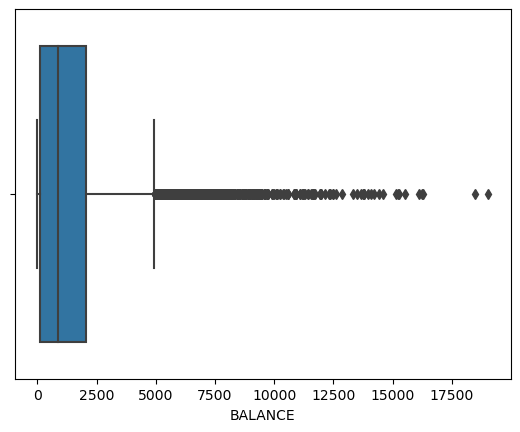

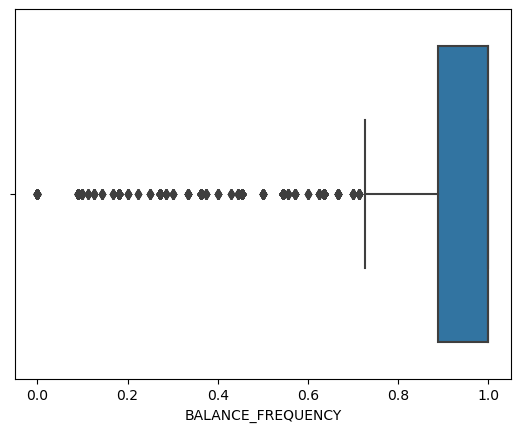

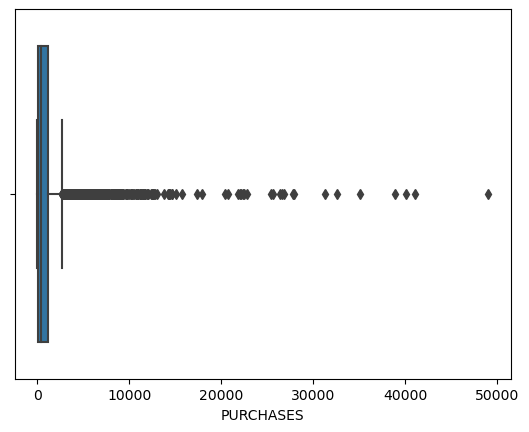

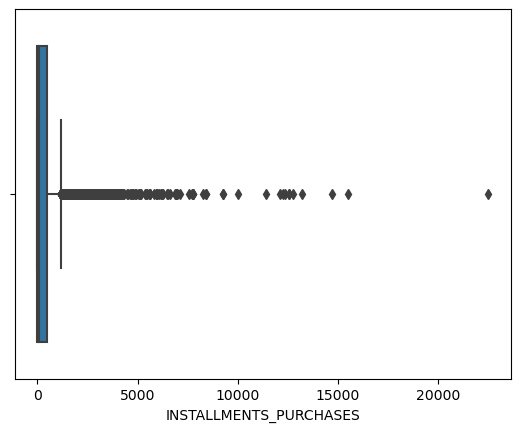

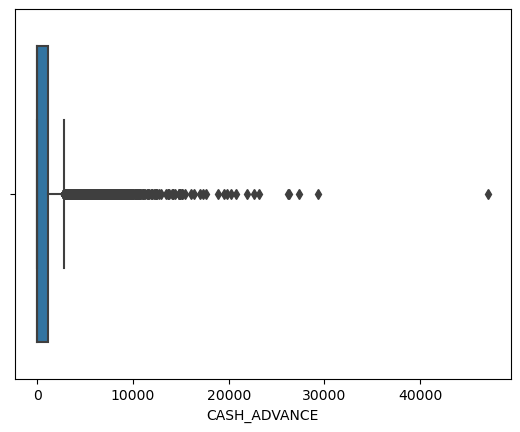

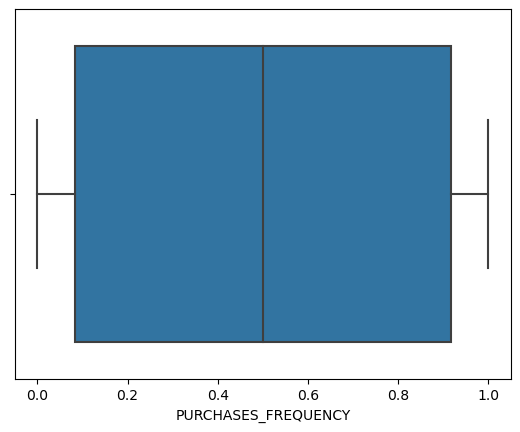

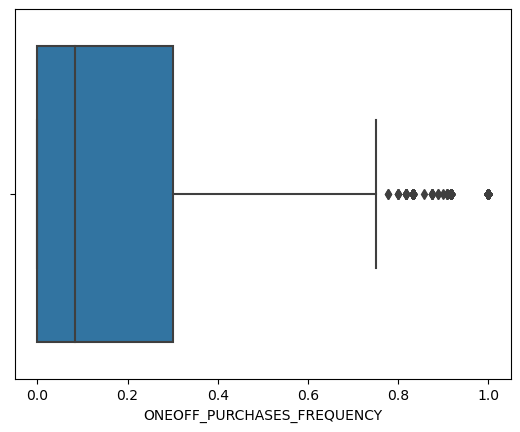

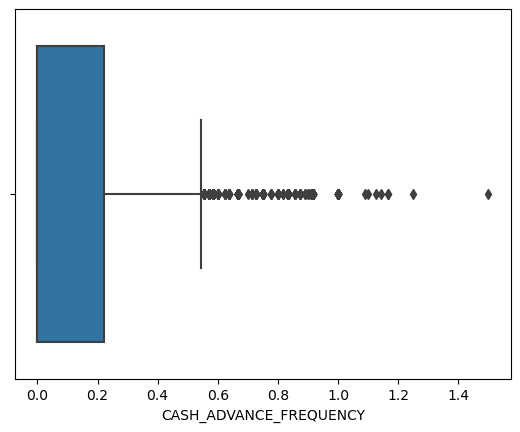

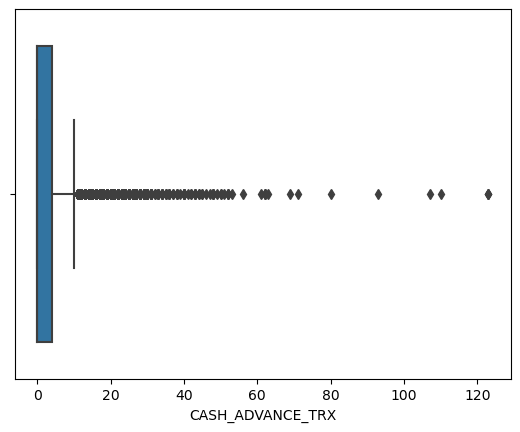

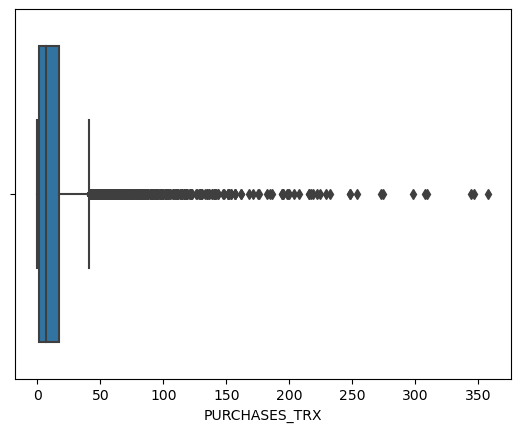

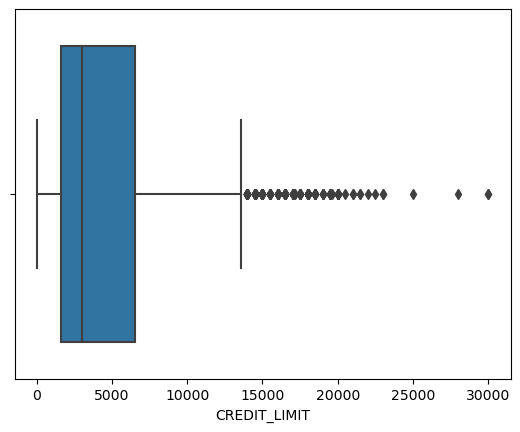

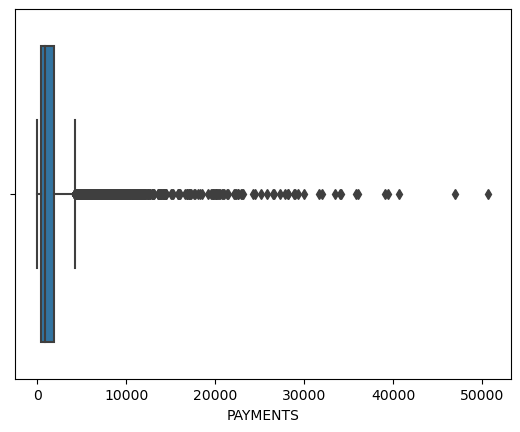

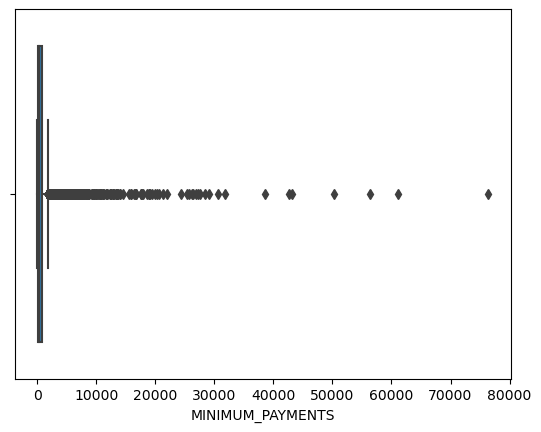

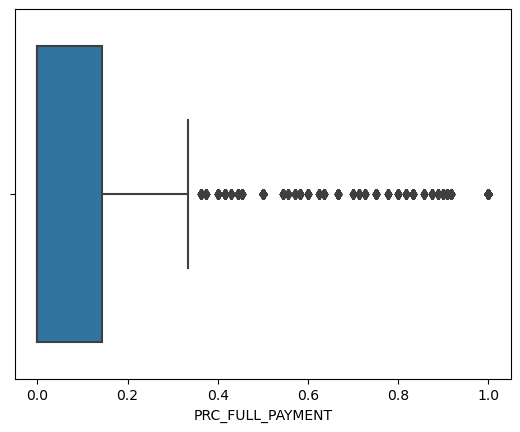

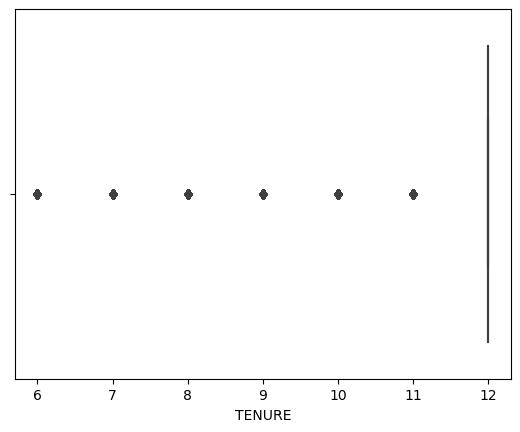

In [51]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [48]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data,axis=0)
    std =np.std(data,axis=0)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [52]:
detect_outliers(df.BALANCE)
detect_outliers(df.PURCHASES)
detect_outliers(df.INSTALLMENTS_PURCHASES)
detect_outliers(df.CASH_ADVANCE)
detect_outliers(df.CREDIT_LIMIT)
detect_outliers(df.PAYMENTS)
detect_outliers(df.MINIMUM_PAYMENTS)

[12136.21996,
 8181.251131,
 9381.255094,
 8504.876253,
 14224.11541,
 11167.23403,
 9354.06045,
 19043.13856,
 10598.46777,
 13673.07961,
 11972.01104,
 8350.145568,
 9047.621884,
 9612.21512,
 7938.559134,
 8097.334733,
 9261.310686,
 9206.811696,
 8939.461145,
 8806.866629,
 11278.95243,
 12474.72954,
 7957.017218,
 11209.37076,
 9335.31417,
 8647.057641,
 9601.071318,
 10249.71178,
 12478.17286,
 13479.28821,
 15258.2259,
 11547.52001,
 8997.488544,
 9149.4096,
 9559.783145,
 7975.19143,
 15244.74865,
 8781.831676,
 8900.194109,
 14411.95798,
 10359.45471,
 13763.47358,
 7811.234174,
 13774.74154,
 10397.09989,
 9470.18498,
 8646.143734,
 9164.724752,
 8220.740014,
 11083.32542,
 10131.00055,
 9901.685569,
 11654.55492,
 14581.45914,
 9255.143419,
 12358.32132,
 12373.33348,
 8823.284205,
 8115.039014,
 8884.816576,
 9387.614011,
 7994.33168,
 7886.875682,
 9680.188434,
 8787.333948,
 8625.355309,
 8151.985277,
 11431.78621,
 8281.348085,
 8767.5693,
 8809.504736,
 8159.168439,
 89

In [53]:
df['BALANCE'].replace(detect_outliers(df.BALANCE),df.BALANCE.median(),inplace=True)
df['PURCHASES'].replace(detect_outliers(df.PURCHASES),df.PURCHASES.median(),inplace=True)
df['INSTALLMENTS_PURCHASES'].replace(detect_outliers(df.INSTALLMENTS_PURCHASES),df.INSTALLMENTS_PURCHASES.median(),inplace=True)
df['CASH_ADVANCE'].replace(detect_outliers(df.CASH_ADVANCE),df.CASH_ADVANCE.median(),inplace=True)
df['CREDIT_LIMIT'].replace(detect_outliers(df.CREDIT_LIMIT),df.CREDIT_LIMIT.median(),inplace=True)
df['PAYMENTS'].replace(detect_outliers(df.PAYMENTS),df.PAYMENTS.median(),inplace=True)
df['MINIMUM_PAYMENTS'].replace(detect_outliers(df.MINIMUM_PAYMENTS),df.MINIMUM_PAYMENTS.median(),inplace=True)

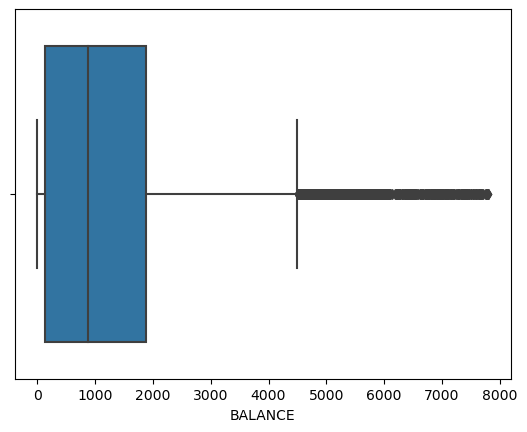

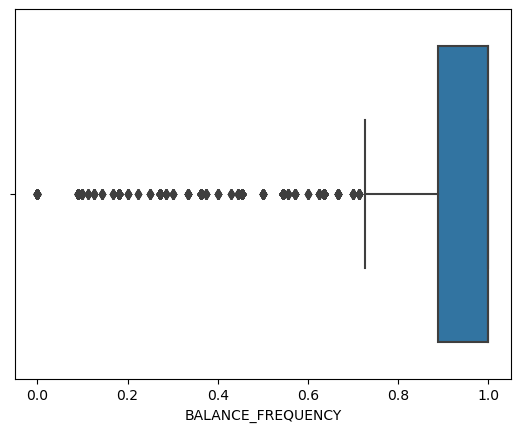

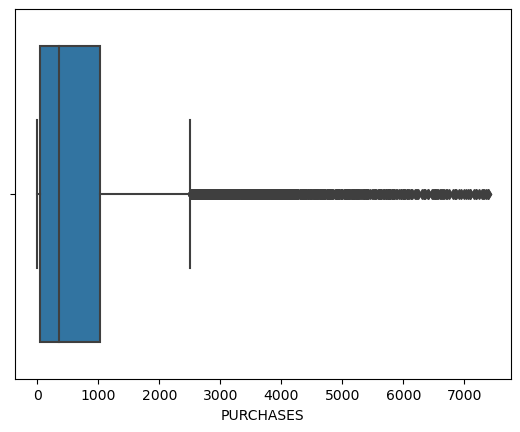

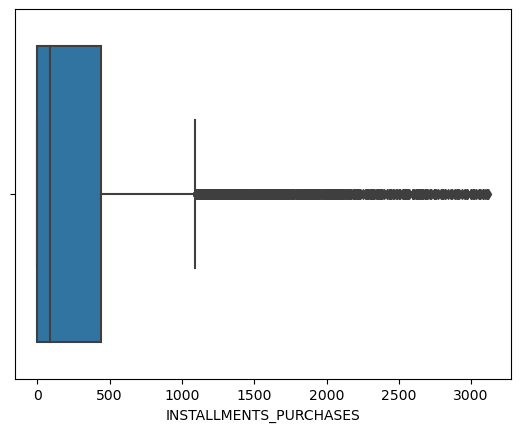

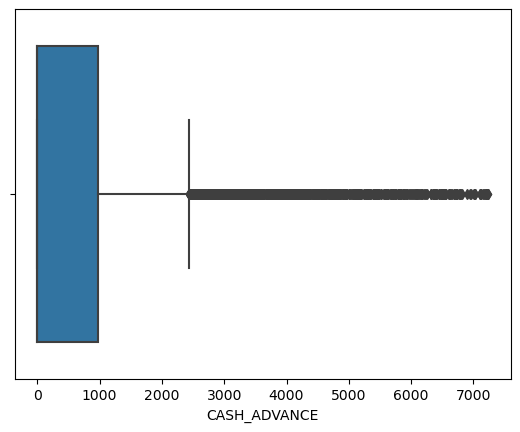

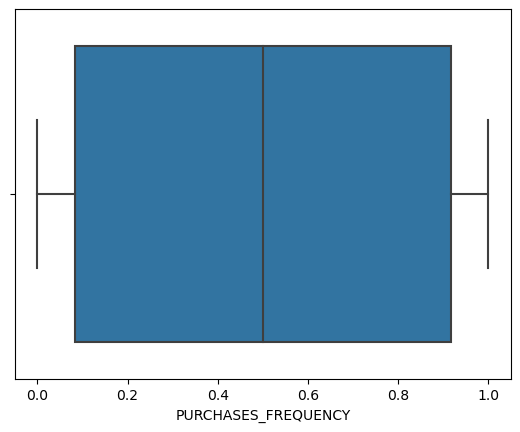

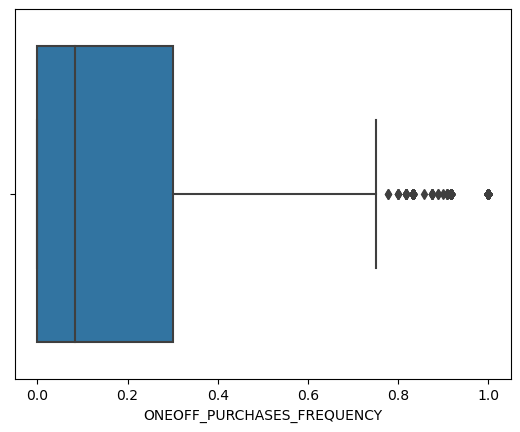

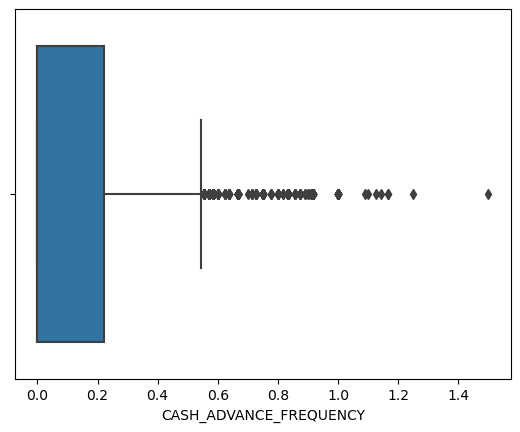

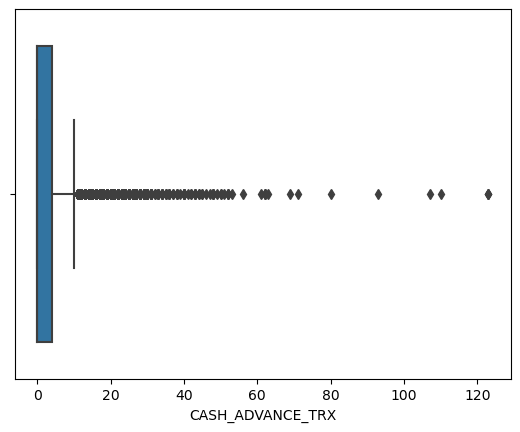

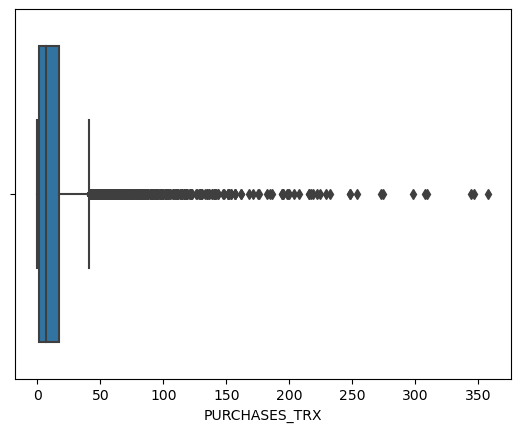

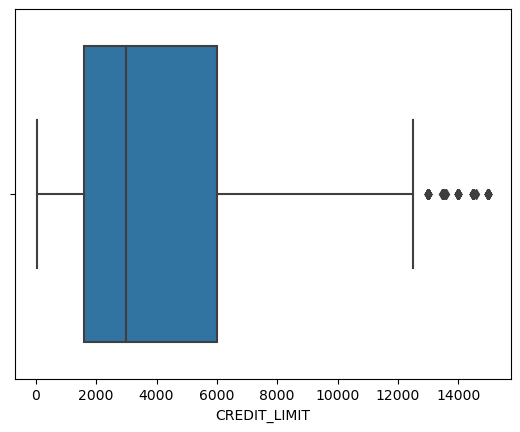

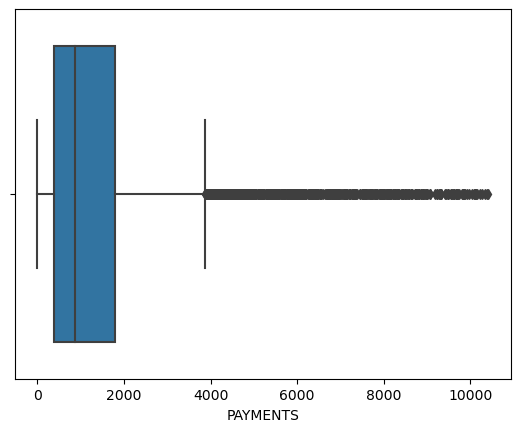

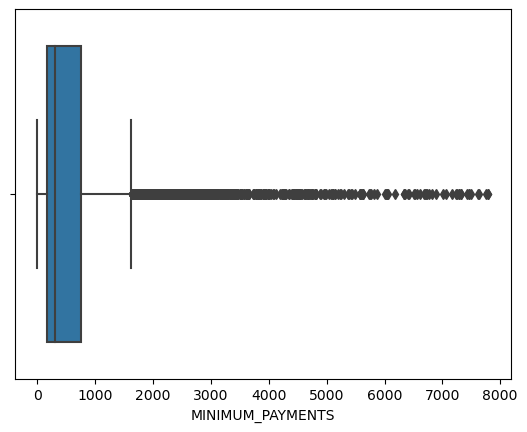

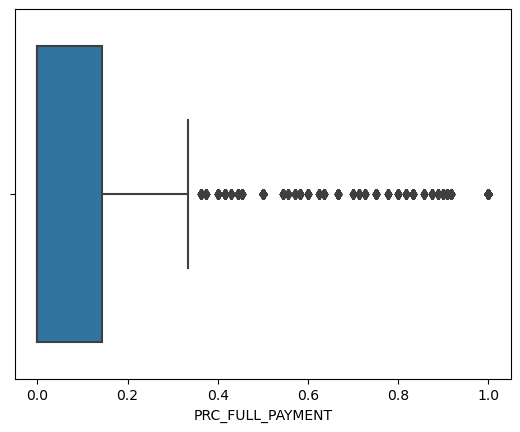

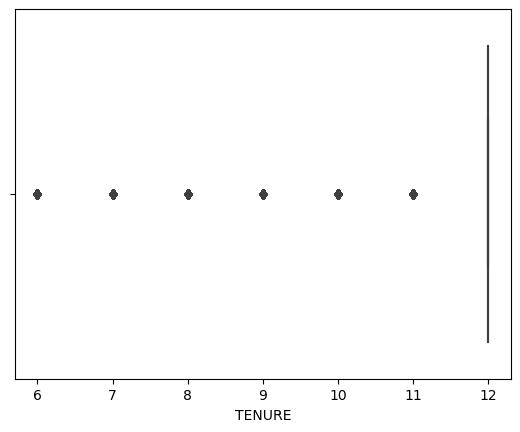

In [54]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [55]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data=scalar.fit_transform(df)

In [58]:
scaled_data=pd.DataFrame(data, columns=df.columns)

Text(0, 0.5, 'WCSS')

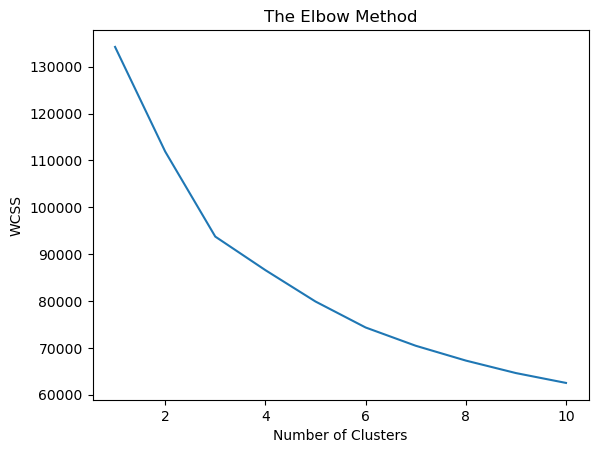

In [61]:
wcss =[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init='k-means++')
    km.fit(scaled_data)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') 

In [63]:
from sklearn.metrics import silhouette_score

In [82]:
for i in range(2,11):
    km=KMeans(n_clusters=i)
    km.fit(df)
    score= silhouette_score(df, km.labels_)
    print("For cluster : {}, the silhouette score is : {}".format(i,score))

For cluster : 2, the silhouette score is : 0.4525798446901703
For cluster : 3, the silhouette score is : 0.3467931916734911
For cluster : 4, the silhouette score is : 0.36074158919419264
For cluster : 5, the silhouette score is : 0.36135819780025547
For cluster : 6, the silhouette score is : 0.32331032694215533
For cluster : 7, the silhouette score is : 0.33598895497764153
For cluster : 8, the silhouette score is : 0.24319866777411678
For cluster : 9, the silhouette score is : 0.2537599309593929
For cluster : 10, the silhouette score is : 0.2543942403540671


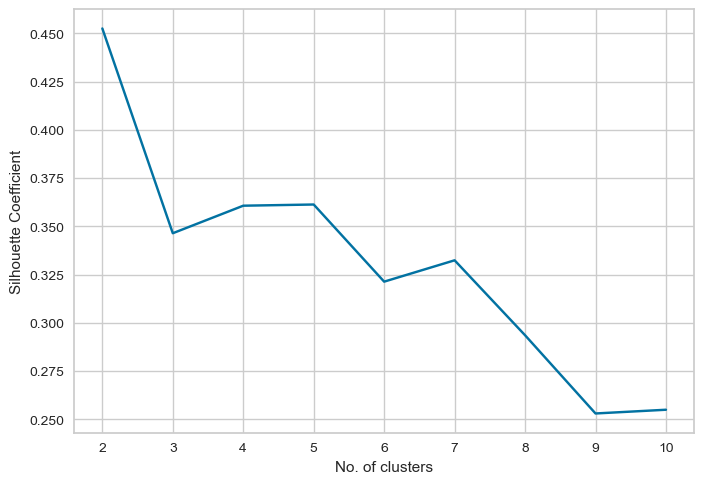

In [83]:
sil_coeff = []
for i in range(2,11):
    km=KMeans(n_clusters=i)
    km.fit(df)
    score= silhouette_score(df, km.labels_)
    sil_coeff.append(score)
    
plt.plot(range(2,11),sil_coeff)
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()           

In [108]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X=pca.fit_transform(df)

In [109]:
km=KMeans(n_clusters=4)
label= km.fit_predict(X)
unique_label=np.unique(label)

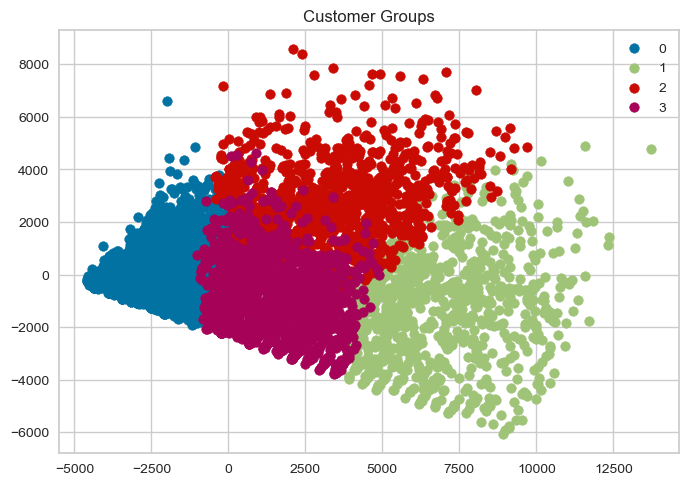

In [110]:
for i in unique_label:
    plt.scatter(X[label==i,0], X[label==i,1] , label =i)
    
plt.legend()
plt.title('Customer Groups')
plt.show()